In [4]:
import pandas as pd
import matplotlib as mt
import numpy as np

#### Importar dados

In [5]:
df_clientes = pd.read_csv("files/churn_customers.csv")
df_contratos = pd.read_csv("files/churn_contracts.csv")
df_servicos = pd.read_csv("files/churn_services.csv")


In [6]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [7]:
df_clientes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
df_clientes.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [9]:
df_clientes.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
df_contratos.dtypes

customerID           object
tenure                int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
#Transformar TotalCharges em float
#Força a conversão de dados | Transforma os erros em nulos.

df_contratos["TotalCharges"] = pd.to_numeric(df_contratos["TotalCharges"] , errors="coerce")

In [12]:
df_contratos.dtypes

customerID           object
tenure                int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
#Alguns valores ficaram nulos e vão ter de ser tratados mais a frente

df_contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


#### Renomear colunas


In [14]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
#Para renomear uma coluna só na visualização

df_clientes.rename(columns={"SeniorCitizen" : "ElderlyPerson"})

,customerID,gender,ElderlyPerson,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [16]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [17]:
#Para renomear uma coluna definitivamente

df_clientes = df_clientes.rename(columns={"SeniorCitizen" : "ElderlyPerson"})

In [18]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   ElderlyPerson  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [19]:
#Outra forma de alterar o nome da coluna, usando o atributo inplace.

df_clientes.rename(columns={"Partner" : "Married"}, inplace=True)

In [20]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   ElderlyPerson  7043 non-null   int64 
 3   Married        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [21]:
#Mudar várias colunas de uma vez só:

df_clientes.columns = ["idcliente", "genero", "idoso", "casado(a)", "dependentes" ]

In [22]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idcliente    7043 non-null   object
 1   genero       7043 non-null   object
 2   idoso        7043 non-null   int64 
 3   casado(a)    7043 non-null   object
 4   dependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


#### Juntando DataFrames


In [23]:
#Todos tem a mesma quantidade de linhas

print(len(df_clientes))
print(len(df_contratos))
print(len(df_servicos))

7043
7043
7043


In [24]:
df_servicos.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


In [25]:
#Unir pelas colunas
#df_servicos e df_clientes possuem a coluna idcliente

#Renomear a coluna no DataFrame df_servicos

df_servicos.rename(columns={"customerID" : "idcliente"}, inplace=True)

In [26]:
df_servicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idcliente         7043 non-null   object
 1   PhoneService      7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   DeviceProtection  7043 non-null   object
 7   TechSupport       7043 non-null   object
 8   StreamingTV       7043 non-null   object
 9   StreamingMovies   7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


In [27]:
#Criar um DataFrame temporario para junção

df_temp = df_clientes.merge(df_servicos, on=["idcliente"])

In [28]:
#Conferindo

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idcliente         7043 non-null   object
 1   genero            7043 non-null   object
 2   idoso             7043 non-null   int64 
 3   casado(a)         7043 non-null   object
 4   dependentes       7043 non-null   object
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   object
 11  TechSupport       7043 non-null   object
 12  StreamingTV       7043 non-null   object
 13  StreamingMovies   7043 non-null   object
dtypes: int64(1), object(13)
memory usage: 770.5+ KB


In [29]:
#Junção com colunas diferentes
#Indicar a coluna a do DataFrame esquerdo e do DataFrame direito.

df_final = df_temp.merge(df_contratos, left_on=["idcliente"], right_on=["customerID"] )

In [30]:
#Verificando

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idcliente         7043 non-null   object 
 1   genero            7043 non-null   object 
 2   idoso             7043 non-null   int64  
 3   casado(a)         7043 non-null   object 
 4   dependentes       7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [31]:
#Fazendo a junção com uma linha de código:

df_final2 = df_clientes.merge(df_servicos, on=["idcliente"]).merge(df_contratos, left_on=["idcliente"], right_on=["customerID"])

In [32]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idcliente         7043 non-null   object 
 1   genero            7043 non-null   object 
 2   idoso             7043 non-null   int64  
 3   casado(a)         7043 non-null   object 
 4   dependentes       7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [33]:
#Remover a coluna customerID pois é igual a coluna idcliente
#Axis = 1 significa coluna; axis = 0 significa linha
#inplace = True remove no DF original e não cria uma novo DF

df_final2.drop(["customerID"], inplace=True, axis=1)

In [34]:
#Verificando

df_final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idcliente         7043 non-null   object 
 1   genero            7043 non-null   object 
 2   idoso             7043 non-null   int64  
 3   casado(a)         7043 non-null   object 
 4   dependentes       7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  tenure            7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Detecção de valores nulos ou ausentes


In [35]:
#Buscar quantos valores nulos tem em cada coluna

df_final2.isna().sum()

idcliente            0
genero               0
idoso                0
casado(a)            0
dependentes          0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [36]:
#Traz os registos que possuem valor ausente em uma coluna


df_final2[df_final2.isna().any(axis=1)]


,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [37]:
#Quantas colunas tem, pelo menos, um valor ausente:

df_final2.isna().any(axis=0).sum()

1

#### Tratar valores nulos ou ausentes


In [38]:
#Remover coluna com valor ausente
#Não recomendado

df_final2.dropna(axis=1)


,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [39]:
#Remover a coluna se TODOS os valores forem nulos

df_final2.dropna(axis=1, how="all")

,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [40]:
#Remover as linhas com valores nulos
#Mais recomendado e seguro

df_final2.dropna(axis=0)


,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [41]:
#Remover linhas com TODOS os valores nulos

df_final2.dropna(axis=0, how="all")

,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Inputação de valores ausentes

In [42]:
#Para susbtituir os valores nulos por 0

df_final2.fillna(0)

,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [43]:
#Para preencher valores de uma coluna específica

df_final2.fillna(value={"TotalCharges": 0})

,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [44]:
#Para preencher pela média

df_final2.fillna(value={"TotalCharges": df_final2["TotalCharges"].mean()})

,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Distribuição das varáveis categóricas (qualitativas)

In [45]:
#Verificar as opções que a coluna possui:

df_final2["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
#Significa que o cliente já deixou de ser cliente ou não da empresa.
df_final2["Churn"].value_counts()

#A resposta YES possui 1869 registros. Significa a quantidade de clientes que não são mais clientes da loja.

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [47]:
#Mesmo comando, porém agora teremos o resultado em porcentagem

df_final2["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Churn'>

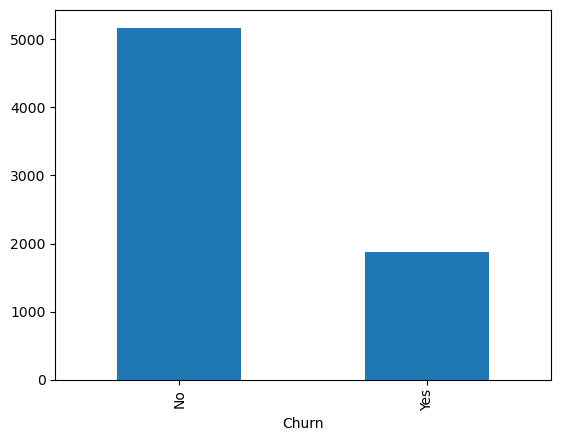

In [48]:
#Para fazer uma gráfico

df_final2["Churn"].value_counts().plot.bar()

[Text(0, 0, '5174'), Text(0, 0, '1869')]

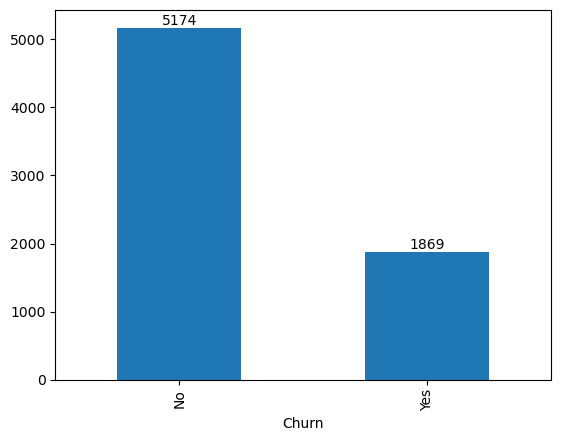

In [49]:
#Para adicionar legendas acima das barras

ax = df_final2["Churn"].value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

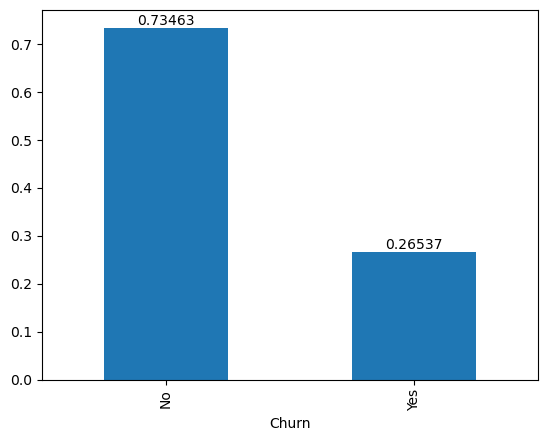

In [50]:
#Em porcentagem

ax = df_final2["Churn"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0])

In [51]:
#Tipos de contrato que a empresa tem
#Usar a função Unique

df_final2["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [52]:
#Quantos contratos tem de cada modelo

df_final2["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

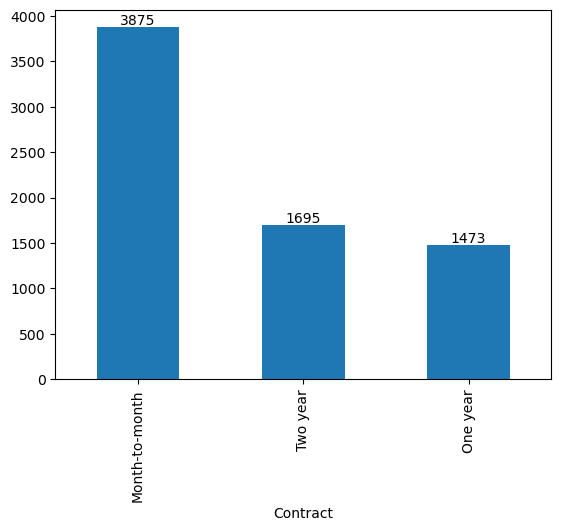

In [53]:
#Gráfico do código anterior

ac = df_final2["Contract"].value_counts().plot.bar()
ac.bar_label(ac.containers[0]) 

[Text(0, 0, '3555'), Text(0, 0, '3488')]

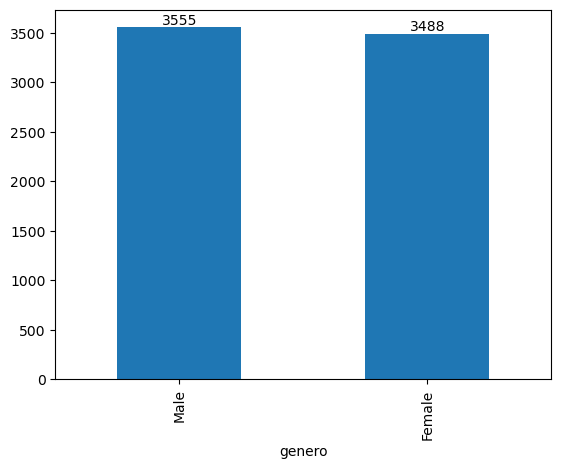

In [54]:
#Análisar os gêneros dos clientes da empresa

gn = df_final2["genero"].value_counts().plot.bar()
gn.bar_label(gn.containers[0])

#### Distribuição de variaveis numericas

In [55]:
df_final2["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

<Axes: ylabel='Frequency'>

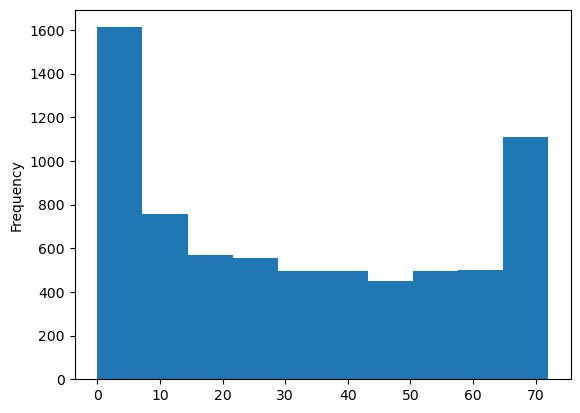

In [56]:
#Criar um gráfico histograma para visualizar 

df_final2["tenure"].plot.hist()

In [57]:
# -A grande concentraçao dos dados está nos extremos, seja contratos com poucos meses ou contratos longos, com mais de 65 meses.

In [58]:
df_final2["MonthlyCharges"].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

<Axes: ylabel='Frequency'>

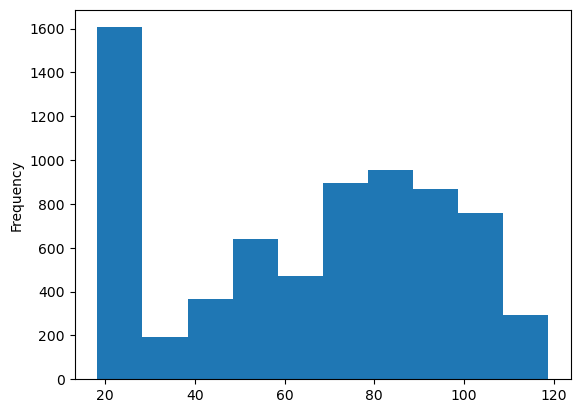

In [59]:
df_final2["MonthlyCharges"].plot.hist()

In [60]:
# - A maioria dos clientes está assinando o plano básico (mais barato).

In [61]:
#Média

df_final2["tenure"].mean()

32.37114865824223

In [62]:
#Mediana

df_final2["tenure"].median()

29.0

In [63]:
# Moda

df_final2["tenure"].mode()

0    1
Name: tenure, dtype: int64

In [64]:
# Desvio padrao 

df_final2["tenure"].std()

#Há uma variaçao de 24 meses em relçao a media

24.55948102309423

In [65]:
# Coeficiente de variaçao (em porcentagem)

df_final2["tenure"].std() / df_final2["tenure"].mean() * 100

75.86842617906603

#### Filtros e agrupamento de valores

In [66]:
#Quais clientes possuem 1 mês de contrato

df_final2[df_final2["tenure"] == 1]

,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,No,No phone service,DSL,No,No,...,No,No,Yes,1,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,5351-QESIO,Male,0,No,Yes,No,No phone service,DSL,No,No,...,No,No,No,1,Month-to-month,No,Mailed check,24.20,24.20,No
7010,0723-DRCLG,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7016,1471-GIQKQ,Female,0,No,No,Yes,No,DSL,No,Yes,...,No,No,No,1,Month-to-month,No,Electronic check,49.95,49.95,No
7018,1122-JWTJW,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


In [67]:
# Retornar apenas a quantidade de clintes com 1 mês de contrato sem detalhes

len(df_final2[df_final2["tenure"] == 1])

613

In [68]:
# Representaçao em porcentagem

(len(df_final2[df_final2["tenure"] == 1]) / len(df_final2)) * 100

8.70367741019452

In [69]:
#Clientes que possuem de 1 a 5 meses de contrato

len(df_final2[(df_final2["tenure"] >= 1) & (df_final2["tenure"] <= 5)])

1360

In [70]:
#Clientes que possuem de 1 a 5 meses de contrato em PORCENTAGEM

len(df_final2[(df_final2["tenure"] >= 1) & (df_final2["tenure"] <= 5)]) / len(df_final2) * 100

19.30995314496663

In [71]:
#Genero de clientes que possuem de 1 a 5 meses de contrato

len(df_final2[(df_final2["genero"] == "Male") & (df_final2["tenure"] <= 5)])

697

In [72]:
#Quantidade de clientes por tempo de contrato de forma descendente 

df_final2.groupby(["tenure"])["tenure"].count().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<Axes: ylabel='tenure'>

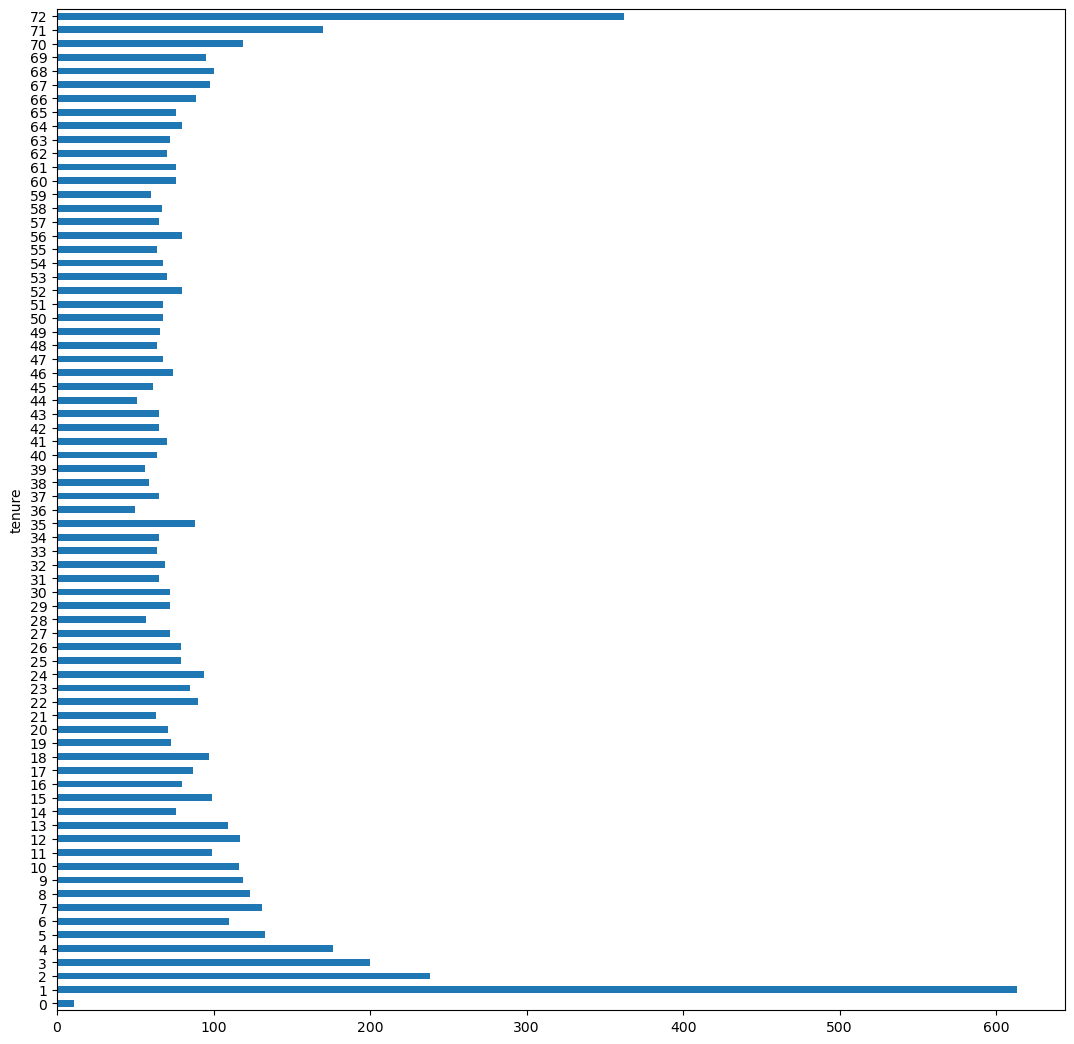

In [73]:
#Representaçao visual

df_final2.groupby(["tenure"])["tenure"].count().plot.barh(figsize=(13,13))

#### Tabela de contigencia 

In [74]:
#Tipo de contrato e quantidade de clientes que deixaram a empresa
#Tabelo cruzada 

pd.crosstab(df_final2["Churn"], df_final2["Contract"])



Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [75]:
#Tipo de contrato e quantidade de clientes que deixaram a empresa
#Tabelo cruzada com TOTAL

pd.crosstab(df_final2["Churn"], df_final2["Contract"], margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


In [76]:
#Tipo de contrato e quantidade de clientes que deixaram a empresa em PORCENTAGEM
#Tabelo cruzada com TOTAL

pd.crosstab(df_final2["Churn"], df_final2["Contract"], normalize=True,  margins=True, margins_name="Total")

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,0.315207,0.185574,0.233849,0.73463
Yes,0.234985,0.023570,0.006815,0.26537
Total,0.550192,0.209144,0.240664,1.00000


In [77]:
#Tipo de contrato e quantidade de clientes que deixaram a empresa em PORCENTAGEM
#Tabelo cruzada com TOTAL

pd.crosstab(df_final2["Churn"], df_final2["Contract"], normalize="index",  margins=True, margins_name="Total")

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682
Total,0.550192,0.209144,0.240664


#### Teste de Qui-quadrado

- H0 (Hipótese Nula): As duas variáveis sao independentes. 
- H1 (Hipótese Complementar): As duas variáveis nao sao independentes.
- No teste, o objetivo é confirmar ou recusar a hipótese Nula.
- Quando o valor de probabilidade H0 for menor do que 0.05 (p-value), recusamos a hipótese nula e aceitamos a complementar.



In [78]:
df_tabcont = pd.crosstab(df_final2["Churn"], df_final2["Contract"])
df_tabcont

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [79]:
from scipy.stats import chi2_contingency


In [80]:
chi_scores = chi2_contingency(df_tabcont)
chi_scores

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [81]:
#Número decimal de uma notaçao científica

pd.set_option("display.float_format", lambda x: "%.15f" % x)

In [82]:
scores_churn = pd.Series(chi_scores[0])
pvalues_scores = pd.Series(chi_scores[1])

In [83]:
#Criar um DataFrame com os dados de qui quadraro e p-value

df_chi_churn = pd.DataFrame ({
    "Qui2" : scores_churn,
    "PValue" : pvalues_scores

})

In [84]:
df_chi_churn

,Qui2,PValue
0,1184.596572083792580,0.000000000000000


In [85]:
#Neste caso, o p-value deu muito abaixo de 0.05. Entao, rejeitamos a hipótese nula e aceitamos o H1. AS variáveis nao sao independentes.
#E pelo chi2 alto, podemos afirmar que há uma alta correlaçao entre as variáveis.


#### Correlaçao entre variável qaulitativa e quantitativa

##### Hipótese:  Cliente com menos de 6 meses de contrato é mais propenso ao churn

In [86]:
import numpy as np

In [87]:
#Criar uma nova variável transformando uma variável quantitativa em qualitativa.

df_final2["TempoMenor6Meses"] = np.where(df_final2["tenure"] < 6, "Yes", "No")

In [88]:
df_final2

,idcliente,genero,idoso,casado(a),dependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,24,One year,Yes,Mailed check,84.799999999999997,1990.500000000000000,No,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,72,One year,Yes,Credit card (automatic),103.200000000000003,7362.899999999999636,No,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,4,Month-to-month,Yes,Mailed check,74.400000000000006,306.600000000000023,Yes,Yes


In [89]:
# Criar uma tabela cruzada

df_crosstab_tempo = pd.crosstab(df_final2["Churn"], df_final2["TempoMenor6Meses"])
df_crosstab_tempo

TempoMenor6Meses,No,Yes
Churn,,
No,4547,627
Yes,1125,744


In [90]:
# Avaliar usando o teste de Qui2

chi_scores = chi2_contingency(df_crosstab_tempo)
chi_scores

Chi2ContingencyResult(statistic=669.7216158287102, pvalue=1.1485390172689518e-147, dof=1, expected_freq=array([[4166.82209286, 1007.17790714],
       [1505.17790714,  363.82209286]]))

In [91]:
#Convertendo dados em Series
scores_churn = pd.Series(chi_scores[0])
pvalue_chrun = pd.Series(chi_scores[1])

In [92]:
#Criar uma data frame com os scores

df_chi_chrun = pd.DataFrame({
    "Qui2" : scores_churn,
    "PValue" : pvalue_chrun
})

df_chi_chrun

,Qui2,PValue
0,669.721615828710242,0.000000000000000


In [93]:
# As duas variáveis nao sao independentes. E há uma correlacao entre as duas variáveis mas nao é tao forte quanto tipo de coontrato x churn.

#### Correlaçao entre 2 variáveis númericas

In [95]:
#Correlaçao de Pearson
#Quanto mais tempo de contrato, maior o valor pago

df_final2["tenure"].corr(df_final2["TotalCharges"])

0.8258804609332016

In [96]:
#Método spearman

df_final2["tenure"].corr(df_final2["TotalCharges"], method="spearman")

0.8891770805365491

<Axes: xlabel='tenure', ylabel='TotalCharges'>

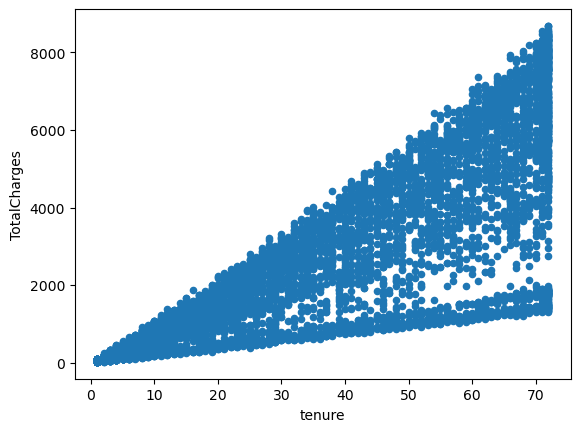

In [97]:
# Gráfico de dispersao

df_final2.plot.scatter(x="tenure", y="TotalCharges")